# **Домашнее задание к лекции "Визуализация данных"**

Набор данных был взят по ссылке:

https://www.kaggle.com/datasets/andrewmvd/sp-500-stocks?resource=download&select=sp500_companies.csv

Data Explorer Version **141** (173.1 MB)

**О наборе данных:**

Представленный индекс S&P 500 фондового рынка отслеживает деятельность 500 крупных публичных компаний, имеющих наибольшую капитализацию и зарегистрированных на фондовых биржах США.

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# from pylab import rcParams
plt.rc('figure', figsize = [15,7])
plt.rc('legend', fontsize = 12)
plt.rc('axes', titlesize = 14)
plt.rc('axes', labelsize = 14)
plt.rc('axes', titlepad = 15)

In [2]:
sp500 = pd.read_csv('https://raw.githubusercontent.com/ArkadiyDrozdov/pyda-31_Python/main/data/sp500_companies_ver141.csv')
sp500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Exchange             496 non-null    object 
 1   Symbol               496 non-null    object 
 2   Shortname            496 non-null    object 
 3   Longname             496 non-null    object 
 4   Sector               496 non-null    object 
 5   Industry             496 non-null    object 
 6   Currentprice         496 non-null    float64
 7   Marketcap            496 non-null    int64  
 8   Ebitda               466 non-null    float64
 9   Revenuegrowth        495 non-null    float64
 10  City                 496 non-null    object 
 11  State                477 non-null    object 
 12  Country              496 non-null    object 
 13  Fulltimeemployees    493 non-null    float64
 14  Longbusinesssummary  496 non-null    object 
 15  Weight               496 non-null    flo

In [3]:
# удалим неинтересующие нас столбцы
df = sp500.drop(['Shortname', 'Longbusinesssummary', 'Weight', 'Symbol'], axis = 1)
df.head(3)

,Exchange,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees
0,NMS,Apple Inc.,Technology,Consumer Electronics,149.24,2448491282432,1.306340e+11,0.086,Cupertino,CA,United States,154000.0
1,NMS,Microsoft Corporation,Technology,Software—Infrastructure,266.82,2003279282176,9.498300e+10,0.184,Redmond,WA,United States,181000.0
2,NMS,Alphabet Inc.,Communication Services,Internet Content & Information,2334.03,1549149405184,9.584100e+10,0.230,Mountain View,CA,United States,163906.0


**Структура компаний из S&P 500 со штаб-квартирой, не находящейся на территории США**

In [4]:
df['Country'].value_counts()
# для построения графика уберем страну США, т.к. именно её компании составляют львиную долю индекса S&P500
# интересно узнать, какова страновая структура компаний со штаб-квартирой, не находящейся в США 

United States     477
Ireland            10
Switzerland         4
United Kingdom      2
Netherlands         1
Israel              1
Bermuda             1
Name: Country, dtype: int64

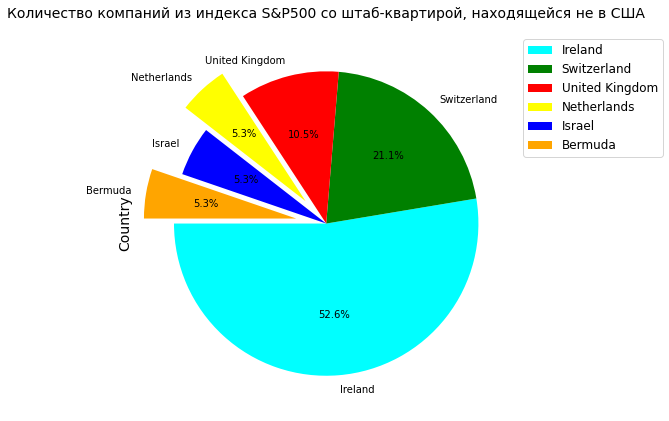

In [18]:
countries = df[df['Country'] != 'United States']
colors = ['cyan', 'green', 'red' ,'yellow', 'blue', 'orange']
countries['Country'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', colors = colors,\
                                         explode = [0,0,0,0.2,0,0.2], startangle = 180, shadow = False)

plt.title('Количество компаний из индекса S&P500 со штаб-квартирой, находящейся не в США')
plt.legend(bbox_to_anchor = (0.85, 0.5, 0.55, 0.5))
plt.show()

Из рисунка видно, что по количеству компаний, входящих в индекс S&P500, на **втором** месте после США занимают **ирландские** компании. При этом компании со штаб-квартирой из Ирландии имеют долю **более 50%** от общего числа всех неамериканских компаний, торгующихся в данный момент на биржах США.

**Число компаний в каждом секторе индекса SP&500**

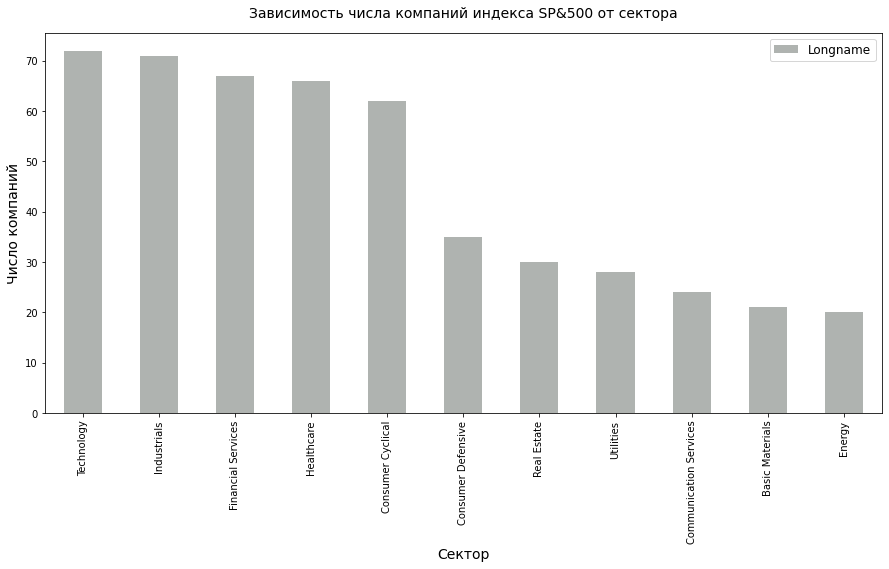

In [19]:
df_sector = df[['Longname', 'Sector']].groupby(['Sector']).count()
df_sector.sort_values('Longname', ascending = False).plot(kind = 'bar', color = '#afb3b0', xlabel = 'Сектор', ylabel = 'Число компаний')
plt.title('Зависимость числа компаний индекса SP&500 от сектора')
plt.show()

Из рисунка видно, что **технологические** компании занимают **наибольшую** долю в индексе SP&500, а **энергетические**, соответственно, **наименьшую**.

**Число компаний из индекса S&P 500, акции которых стоят более 500 долларов США по состоянию на 18 мая 2022 года**

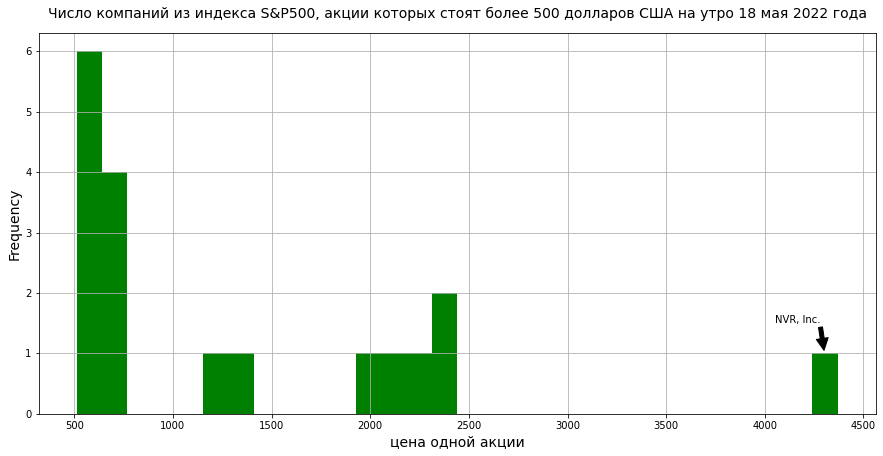

По состоянию на 18.05.2022 до открытия ОС акции лишь 3.6 % компаний из индекса S&P500 стоят дороже 500 долларов США.


In [20]:
df['Currentprice'][df['Currentprice'] > 500].plot(kind = 'hist', bins = 30, density = False, color = 'green')
plt.xlabel('цена одной акции')
plt.title('Число компаний из индекса S&P500, акции которых стоят более 500 долларов США на утро 18 мая 2022 года')
plt.grid(True)
plt.annotate('NVR, Inc.', xy = (4300, 1.05), xytext = (4050, 1.5), arrowprops = dict(facecolor = 'black'))
plt.show()

# Посмотрим как коррекция на рынке привела к падению стоимости акций компаний, входящих в S&P500.
num = round(df['Currentprice'][df['Currentprice'] > 500].count() / len(df) * 100, 1)
print(f'По состоянию на 18.05.2022 до открытия ОС акции лишь {num} % компаний из индекса S&P500 стоят дороже 500 долларов США.')

**Распределение компаний в S&P500 в зависимости от роста или падения выручки**

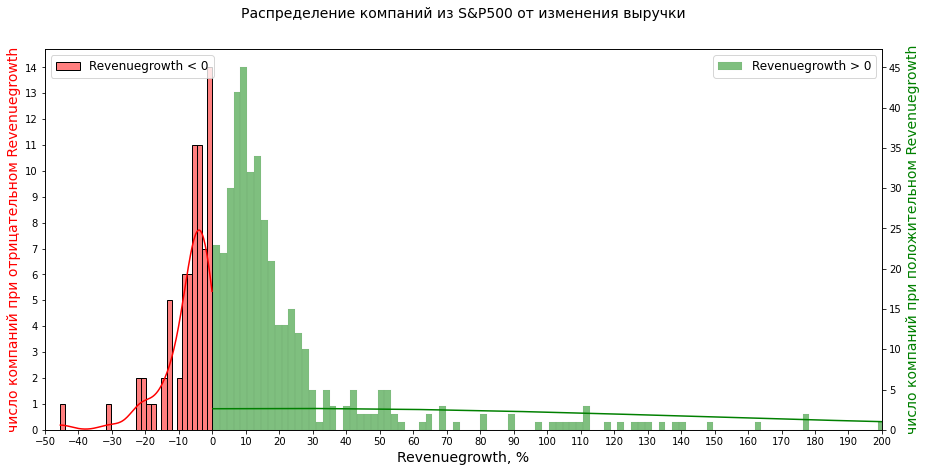

Вывод: всего 14.5% компаний из индекса S&P500 показало падение выручки.


In [21]:
ax1 = sns.histplot(df.Revenuegrowth[df.Revenuegrowth < 0], bins = 30, kde = True, color = 'red', label = 'Revenuegrowth < 0')
ax1.set_ylabel('число компаний при отрицательном Revenuegrowth', color = 'red')
ax1.set_xlabel('Revenuegrowth, %')
ax1.set_yticks(range(0,15,1))

ax2 = plt.twinx()
ax2.set_ylabel('число компаний при положительном Revenuegrowth', color = 'green')
ax2.set_yticks(range(0,50,5))
sns.histplot(df.Revenuegrowth[df.Revenuegrowth > 0], ax = ax2, bins = 3000, kde = True, color = 'green', label = 'Revenuegrowth > 0')

ax1.legend(loc = 'upper left')
ax2.legend(loc = 'upper right')

plt.xticks(range(-100,500,10))
plt.xlim(-50, 200)
plt.title('Распределение компаний из S&P500 от изменения выручки\n')
plt.show()

print(f'Вывод: всего {round(df.Revenuegrowth[df.Revenuegrowth < 0].count() / len(df) * 100, 1)}% компаний из индекса S&P500 \
показало падение выручки.')

Следовательно, **большинство** компаний продемонстрировало **хорошие** результаты своей работы за прошлый год, несмотря на **рост инфляции** в США. При этом **наибольшее** число компаний из индекса показало рост либо падение своей выручки на величину **не более** 10%.

**Общая рыночная капитализация и суммарная прибыль до всех вычетов (Ebitda) всех компаний по секторам индекса S&P500**

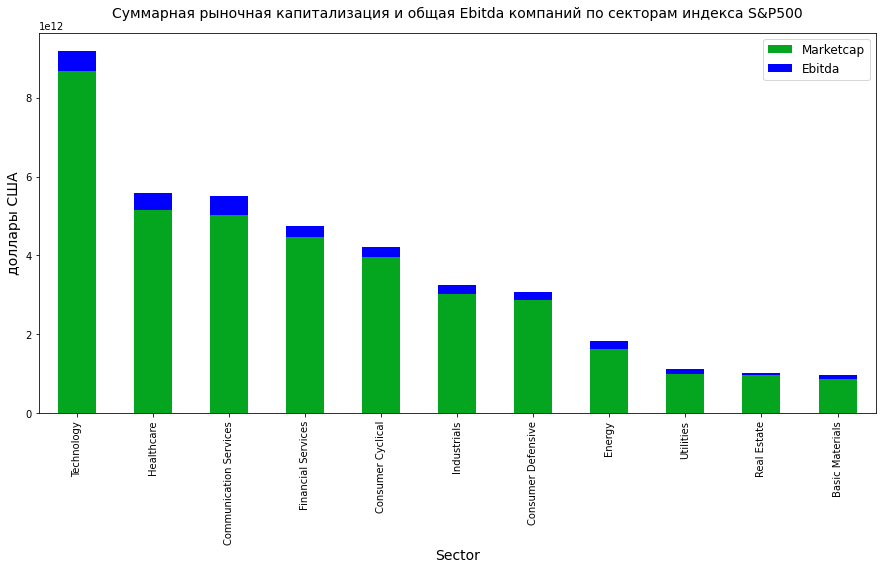

In [23]:
Exchange = df.groupby('Sector')[['Marketcap', 'Ebitda']].sum()
Exchange.sort_values('Marketcap', ascending = False).plot(kind = 'bar', color = ['#03a61e', 'blue'], stacked = True)
plt.title('Суммарная рыночная капитализация и общая Ebitda компаний по секторам индекса S&P500')
plt.ylabel('доллары США')
plt.show()

Видно, что компании из сектора технологий **лидируют** среди всех компаний индекса S&P500 по своей суммарной рыночной капитализации и общей прибыли до вычета всех налогов. Это обусловлено сегодняшним бурным развитием информационных технологий.

Интересно также, что общая рыночная капитализация компаний из сектора недвижимости ("Real Estate") приближается к своей прибыли до вычета налогов.

**Визуализируем количество штатных сотрудников в компаниях SP&500 по отдельным секторам и индустрии**

In [10]:
Employees_sector_industry = pd.pivot_table(df, index = 'Industry', columns = 'Sector', values = 'Fulltimeemployees', aggfunc = sum, fill_value = 0)
Employees_sector_industry.head().style.background_gradient(cmap = 'YlOrRd')


Sector,Basic Materials,Communication Services,Consumer Cyclical,Consumer Defensive,Energy,Financial Services,Healthcare,Industrials,Real Estate,Technology,Utilities
Industry,,,,,,,,,,,
Advertising Agencies,0,127300,0,0,0,0,0,0,0,0,0
Aerospace & Defense,0,0,0,0,0,0,0,760400,0,0,0
Agricultural Inputs,42895,0,0,0,0,0,0,0,0,0,0
Airlines,0,0,0,0,0,0,0,373405,0,0,0
Apparel Manufacturing,0,0,72500,0,0,0,0,0,0,0,0


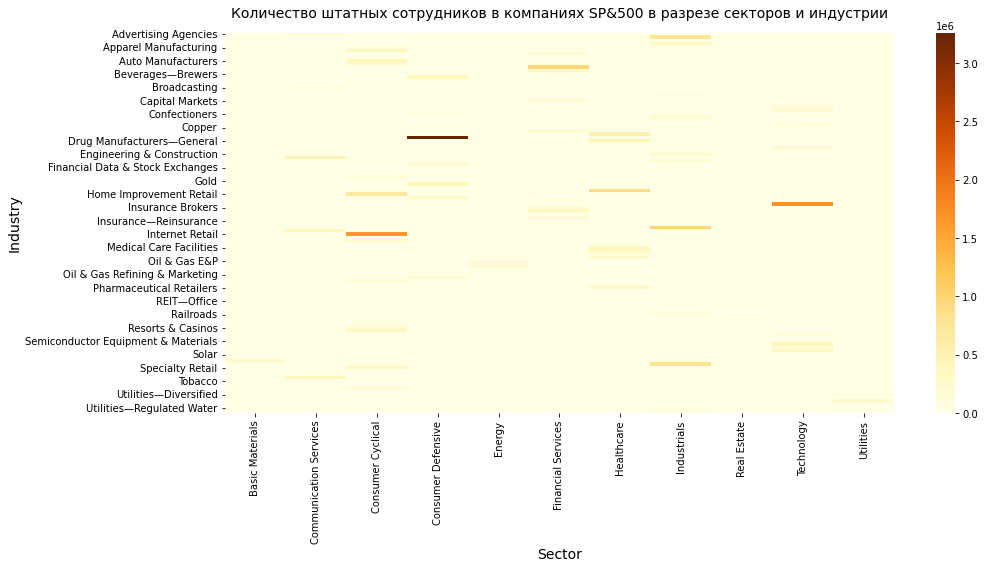

In [24]:
sns.heatmap(Employees_sector_industry, cmap = 'YlOrBr')
plt.title('Количество штатных сотрудников в компаниях SP&500 в разрезе секторов и индустрии')
plt.show()

Видим, что **больше** всего штатных сотрудников работают в компаниях сектора **Consumer Defensive**.

**Consumer Defensive** - потребительские товары первой необходимости, т.е. массового потребления. 

Поэтому, на мой взгляд, и требуется много штатных сотрудников для обслуживания клиентов, каждый день совершающих жизненноважные покупки.

Также дополнительно проиллюстрируем ответ на вопрос, к какой именно индустрии относятся найденные компании из сектора Consumer Defensive.

Предположим сейчас, что это будут те компании, стоимость товаров которых будет доступна большому числу населения планеты, т.е. с адекватными / низкими ценами.

In [12]:
Employees = df.groupby(['Sector', 'Industry']).agg({'Fulltimeemployees': 'sum', 'Marketcap': 'sum'}).reset_index()
Employees.sort_values('Fulltimeemployees', ascending = False).head()

# Как мы и предполагали, это оказались магазины индустрии "Discount Stores", торгующие потребительские товары со скидками (дисконтом).
# Интересно, что число работников в таких магазинах почти в 2 раза превышает количество сотрудников компаний информационных технологий, находящихся на втором месте.

,Sector,Industry,Fulltimeemployees,Marketcap
36,Consumer Defensive,Discount Stores,3262886.0,772881645568
102,Technology,Information Technology Services,1707442.0,587021351424
21,Consumer Cyclical,Internet Retail,1635202.0,1210714617856
80,Industrials,Integrated Freight & Logistics,987373.0,270371896320
49,Financial Services,Banks—Diversified,956525.0,940126453760


Далее добавим третью ось графика - **общую капитализацию** компаний по каждой индустрии в секторе **"Consumer Defensive"**:

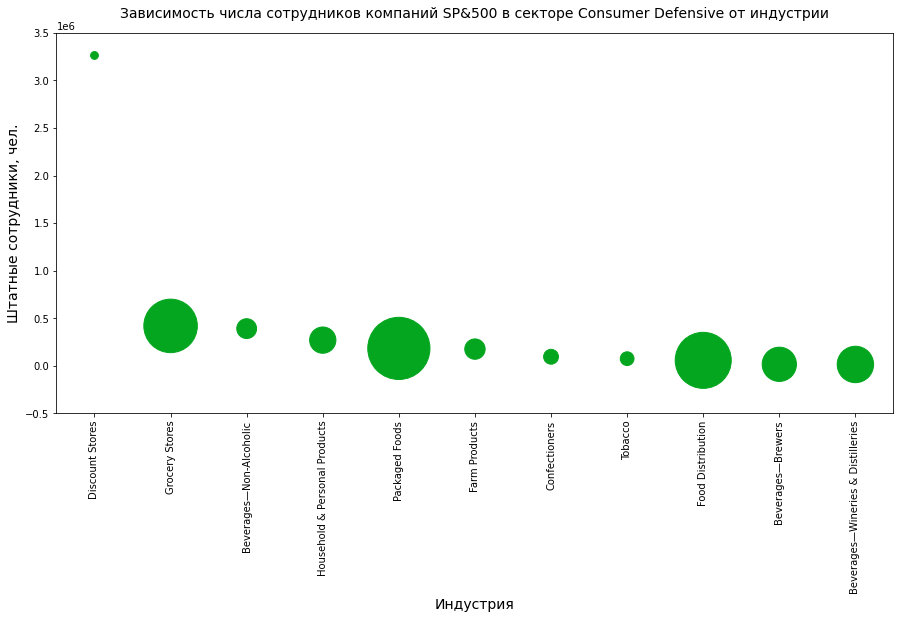

In [25]:
df_ = Employees[Employees['Sector'] == 'Consumer Defensive']
df_.sort_values('Fulltimeemployees', ascending = False).plot(kind = 'scatter', x = 'Industry', \
                        y = 'Fulltimeemployees', s = df_['Marketcap'] / 200000000, color = '#03a61e')

plt.xticks(rotation = 90); plt.ylim(-5e5, 3.5e6)
plt.title('Зависимость числа сотрудников компаний SP&500 в секторе Consumer Defensive от индустрии')
plt.xlabel('Индустрия')
plt.ylabel('Штатные сотрудники, чел.')
plt.show()

Дальнейший анализ графика показывает, что у компаний, занимающихся производством упакованных продуктов питания (**Packaged Foods**) сектора "**Consumer Defensive**", общая рыночная капитализация **превосходит** такую для компаний с наибольшим числом штатных сотрудников из индустрии "**Discount Stores"**.

В категорию "Packaged Foods" входят, например, такие компании - гиганты как PepsiCo, The Kraft Heinz Company или General Mills, общая рыночная капитализация которых может превосходить менее капитализированные компании из индустрии "Discount Stores".

**Гораздо меньшее** штатное число сотрудников компаний из **"Packaged Foods"** по сравнению с количеством людей из "Discount Stores", по-видимому, наблюдается из-за более оптимизированного процесса производства товаров вследствие большей капитализации компаний (т.е. наличие большего количества свободных денег).

**Проведем поиск выбросов, отобразим диаграмму размаха**
* по числу штатных работников
* по цене акций компаний
* по росту выручки компаний

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


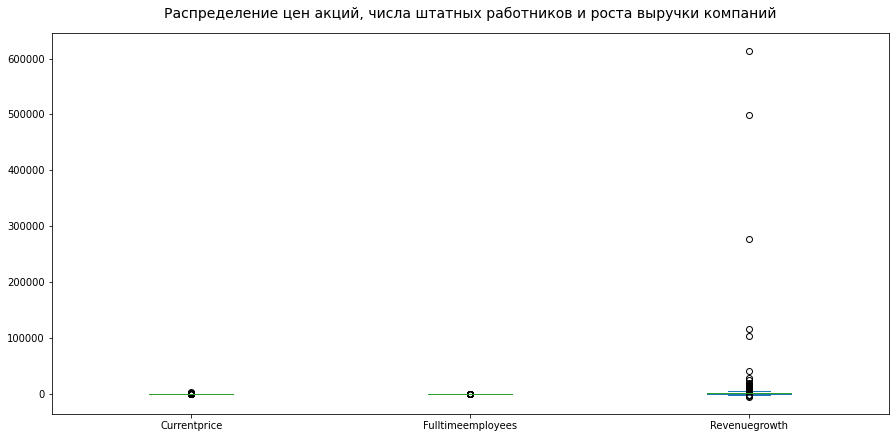

In [26]:
df['Fulltimeemployees'] = df['Fulltimeemployees'] / 1000 # приведем числовые данные к одному порядку для лучшей визуализации
df['Revenuegrowth']     = df['Revenuegrowth'] * 100
df[['Currentprice', 'Fulltimeemployees', 'Revenuegrowth']].plot(kind = 'box', title = 'Распределение цен акций, числа штатных работников и роста выручки компаний') 
plt.show()

Из рисунка видно, что наибольшее число отклонений для представленных трех наборов данных компаний из S&P500 (*цена акций*, *число штатных сотрудников* и *рост выручки*) от их среднего наблюдается для параметра "**Revenuegrowth**". 

Это, по-видимому, связано с тем, что выручка большинства компаний сильно выросла с весны 2020 года из-за мягкой политики ФРС США. Сейчас же, судя по текущим отчетам компаний, этот показатель сильно уменьшается из-за повышенной инфляции и других факторов.